In [231]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [232]:
# Import the numpy and pandas package as well as visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler as mms

# Inspecting the shape and info of the dataset

Importing data using the pandas library
Understanding the structure of the data

In [233]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv("day.csv")
advertising.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [234]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [235]:
#summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [236]:
#Datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [237]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the dataset

In [238]:
#Rename the columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [239]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600



# Data Visualisation

In [240]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

### Visualising Numeric Variables

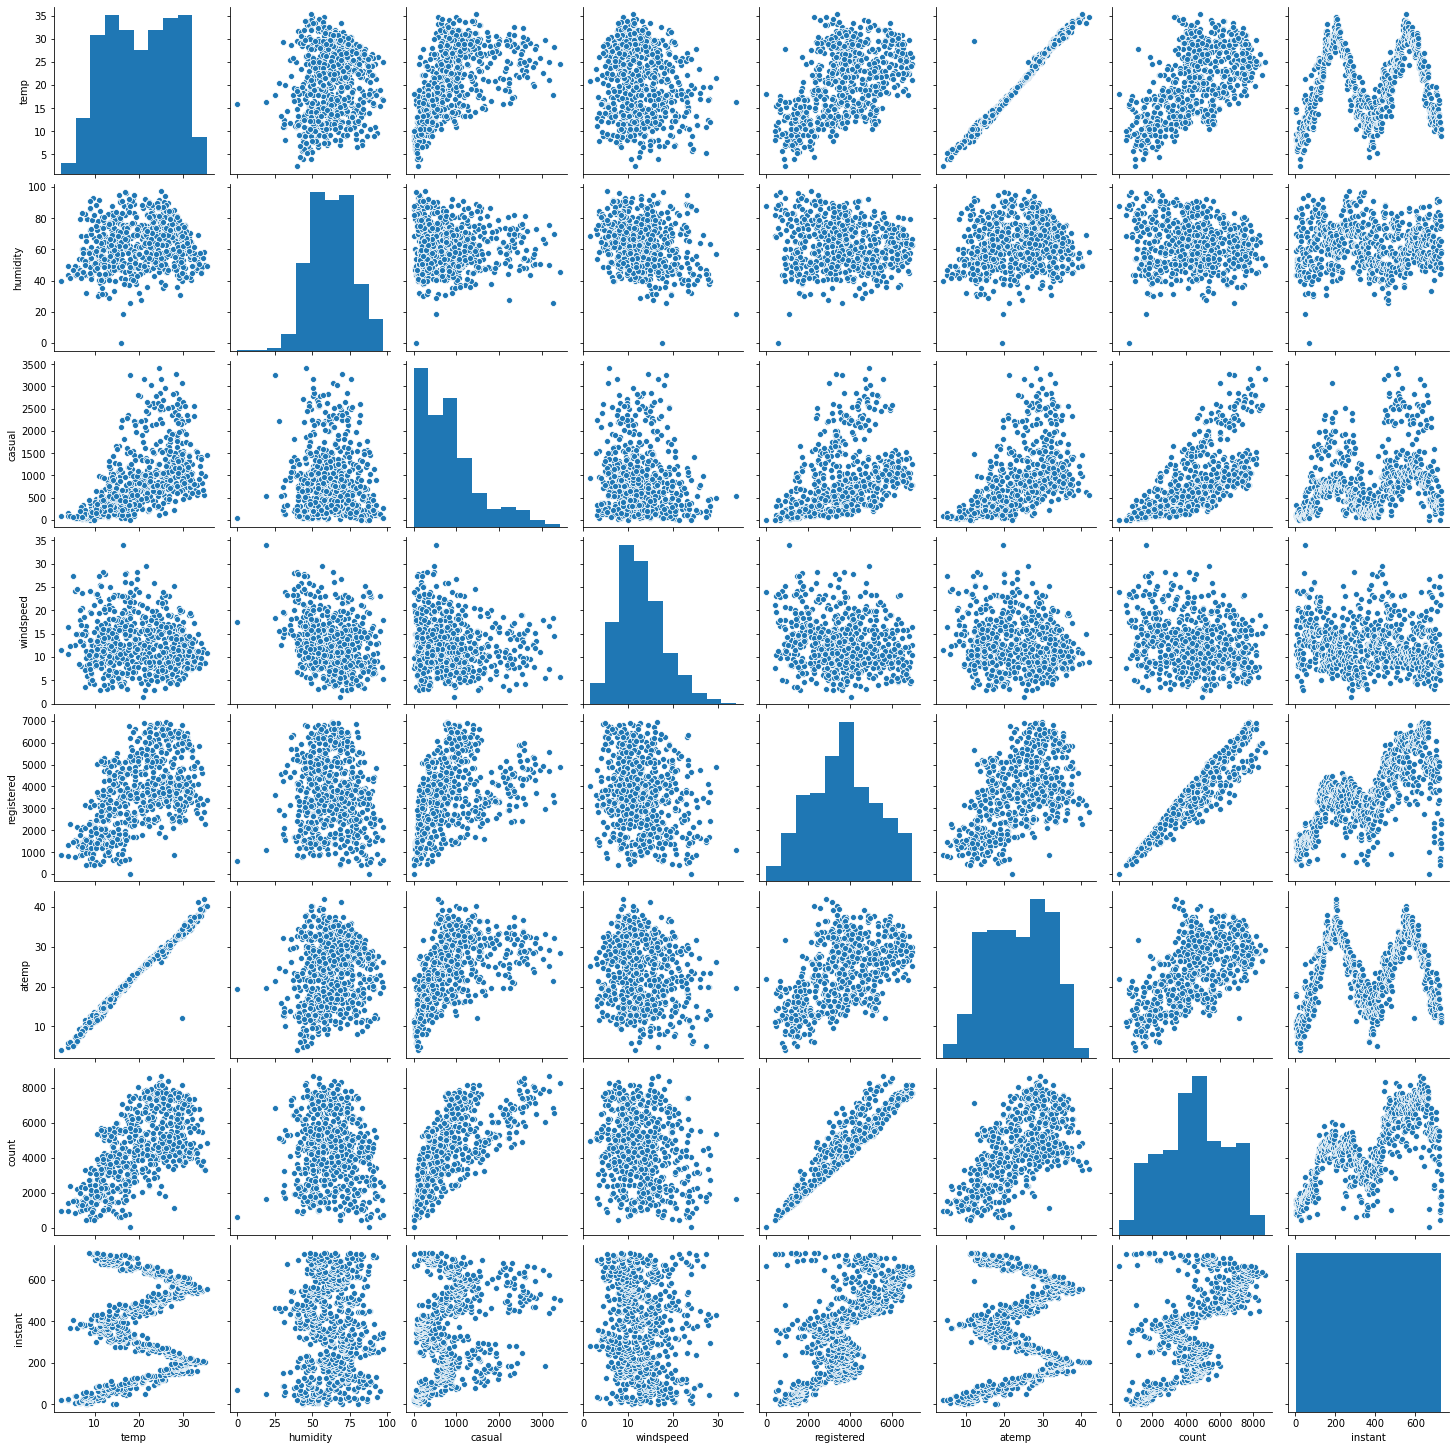

In [241]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

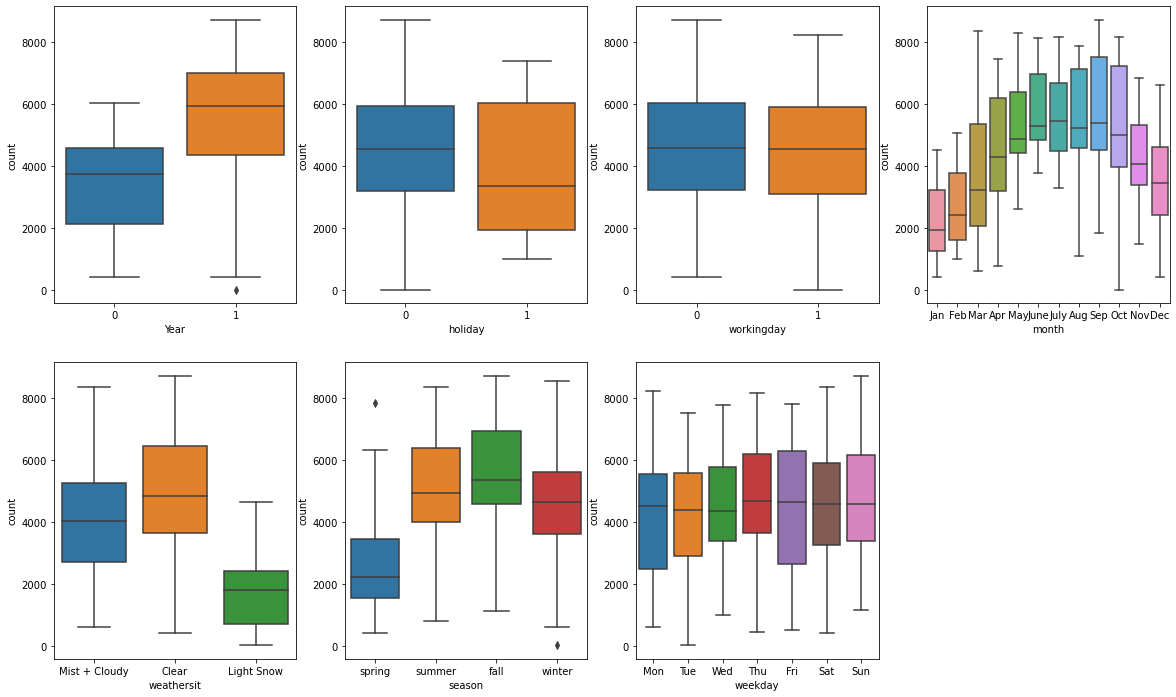

In [242]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

    Bike Rentals are more during the Fall season and then in summer
    Bike Rentals are more in the year 2019 compared to 2018
    Bike Rentals are more in partly cloudy weather
    Bike Rentals are more on Saturday,wednesday and thursday

Lets understand the variables better

1: Season

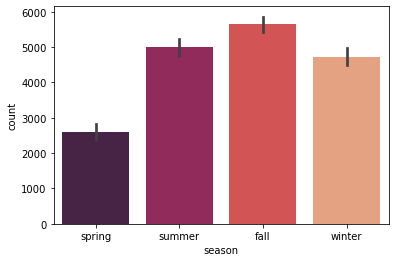

In [243]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','count',data=bike,palette="rocket",)
plt.show()


Bike Rentals are more during the Fall season and then in summer




2: Weathersit

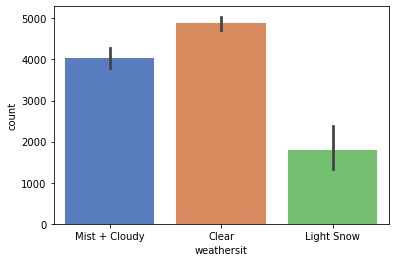

In [244]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="muted",data=bike)
plt.show()

Bike Rentals are more in partly cloudy weather

3: Year

year (0: 2018, 1:2019)

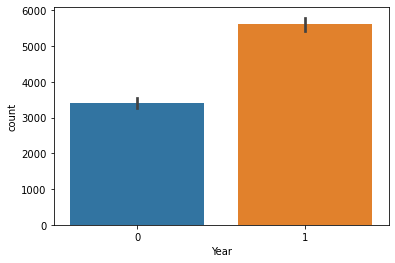

In [245]:
#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=bike)
plt.show()

Bike rentals are more in the year 2019 compared to 2018

4: Month

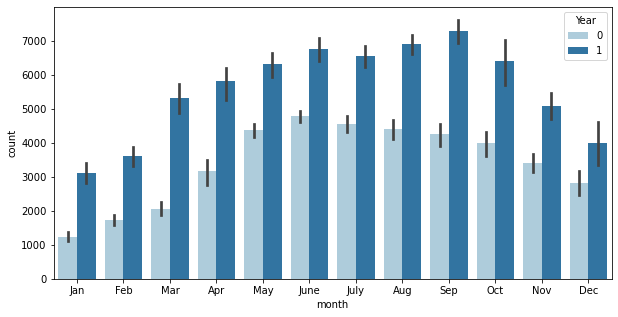

In [246]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=bike,palette='Paired')
plt.show()

`Bike Rentals are more in the year 2019 compared to 2018

5: Temperature

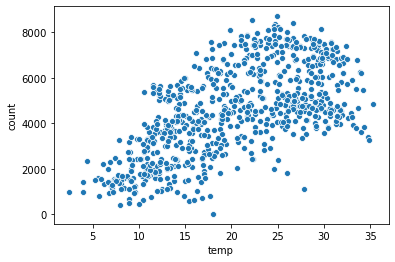

In [247]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

Bike Rentals are observed at higher temperatures

6: Humidity

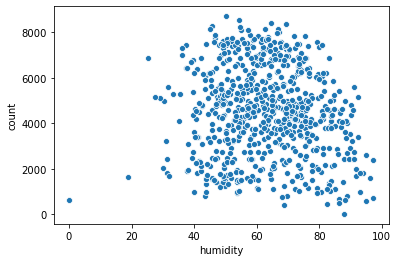

In [248]:
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

Bike rentals more at high humidity

Heatmap

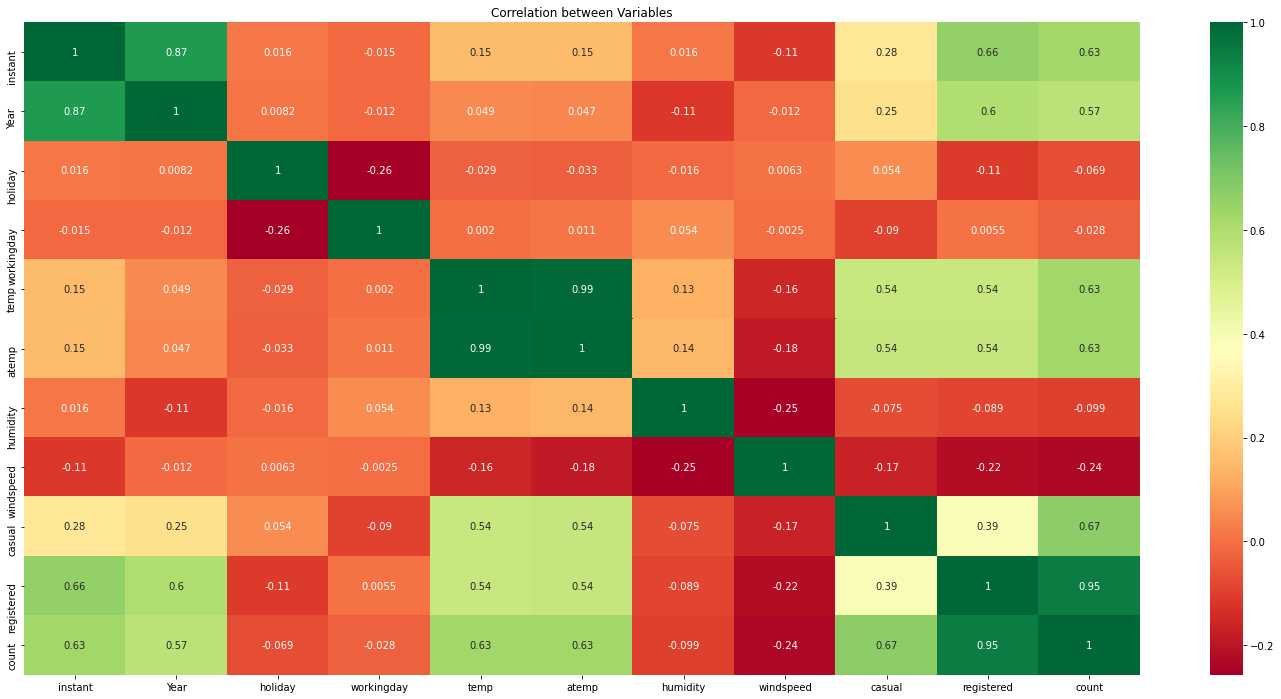

In [249]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable

    We can also see some other variables are also most correlated.
    Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
    So yes we can consider a Linear Regression Model.
    Drop the unnecessary variables from the dataset
  We can see the dataset has some variables that are not required. We can drop instant, dteday, casual, registered

In [250]:
#drop unnecessary columns
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


Check the datatypes

In [251]:
#Checking datatypes of all the columns
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

Step 3: Data Preparation

Dummy variables

In [252]:
# # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

#bike=pd.concat([seasons,bike], axis=1)

In [253]:
# Add the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [254]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [255]:
#Number of rows and columns
bike.shape

(730, 29)

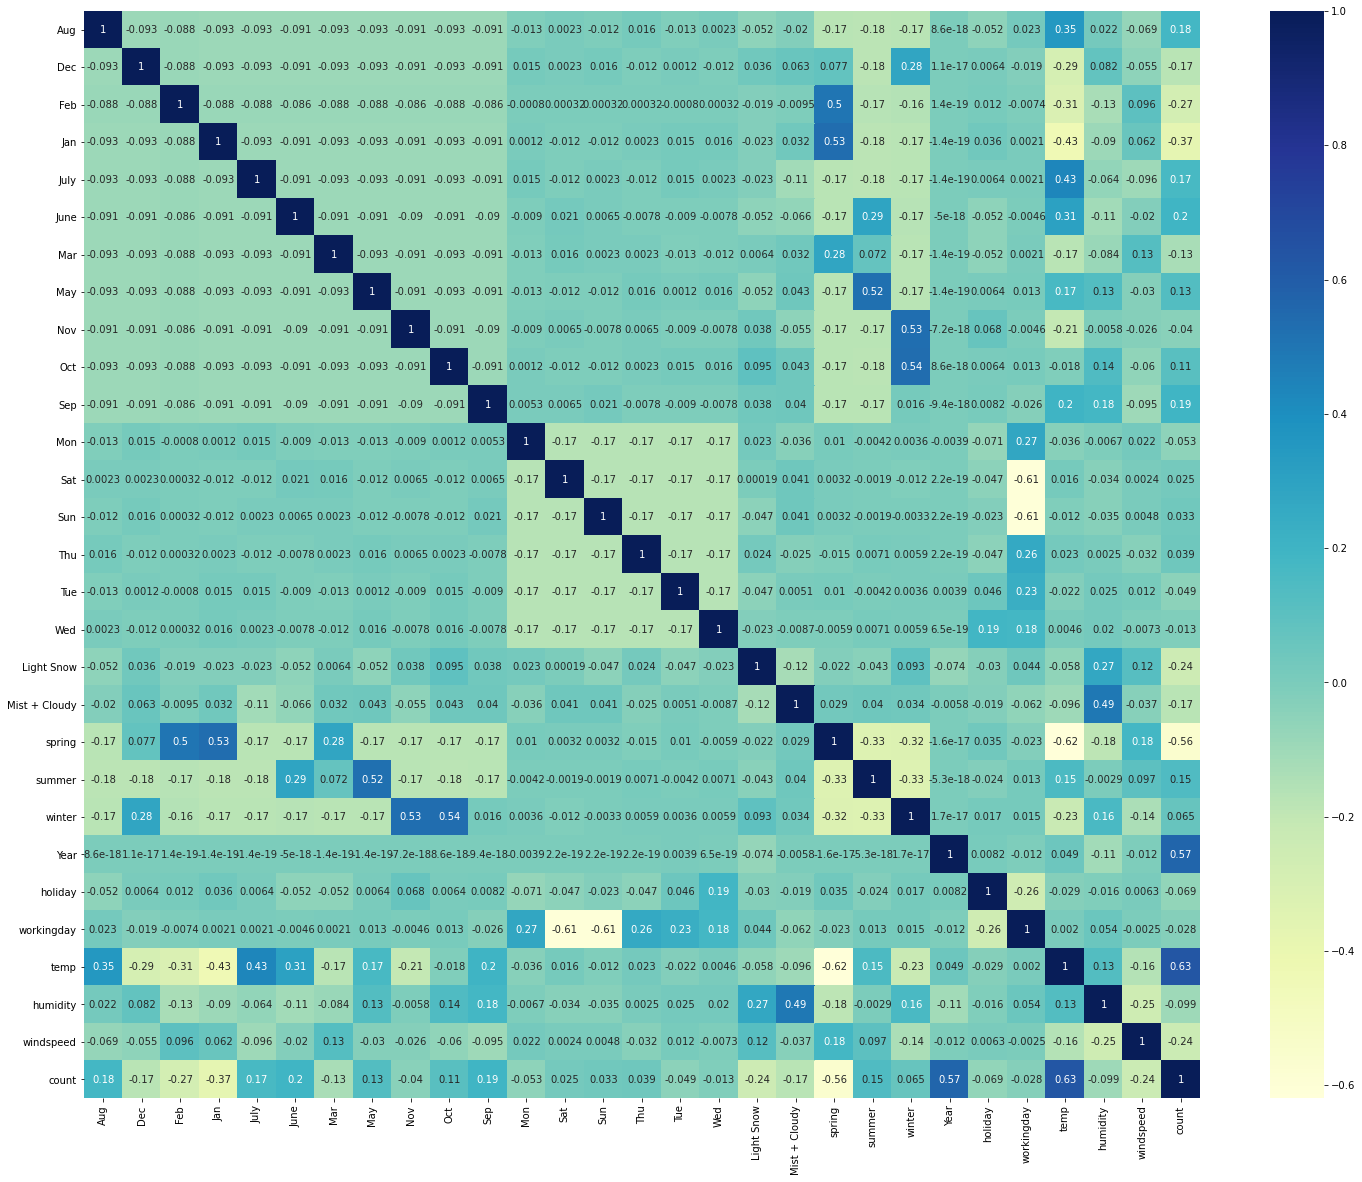

In [256]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

# Splitting the dataset into Train and Test Dataset

Before model building, you first need to perform the test-train split and scale the features.

In [288]:
# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
bikedf_train,bikedf_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [289]:
#Checking the shape of the Train and Test Data

print(bikedf_train.shape)
print(bikedf_test.shape)

(510, 29)
(220, 29)


# Scaling the variables 

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

Min-Max scaling (Normalisation):Between 0 and 1

Standardisation :mean-0, sigma-1

In [292]:
# From now on we will be using the Train dataset (bikedf_train) to build our model
# MinMax scaling the numeric variables of the Train Dataset
# Scaling should always be performed after splitting the dataset into Train and Test set

from sklearn.preprocessing import MinMaxScaler as mms

#Instantiate the minmaxscaler object
minmaxscaler = mms()

#Creating list of numeric variables to be scaled
numeric_variables = ['temp','humidity','windspeed','count']

#Fit_Transform the numeric variable for scaling. Fit_Transform should only be used on the Train Dataset and NOT the Test Dataset
bikedf_train[numeric_variables] = minmaxscaler.fit_transform(bikedf_train[numeric_variables])
bikedf_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [293]:
# Checking the statistical values of the scaled data to verify

bikedf_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


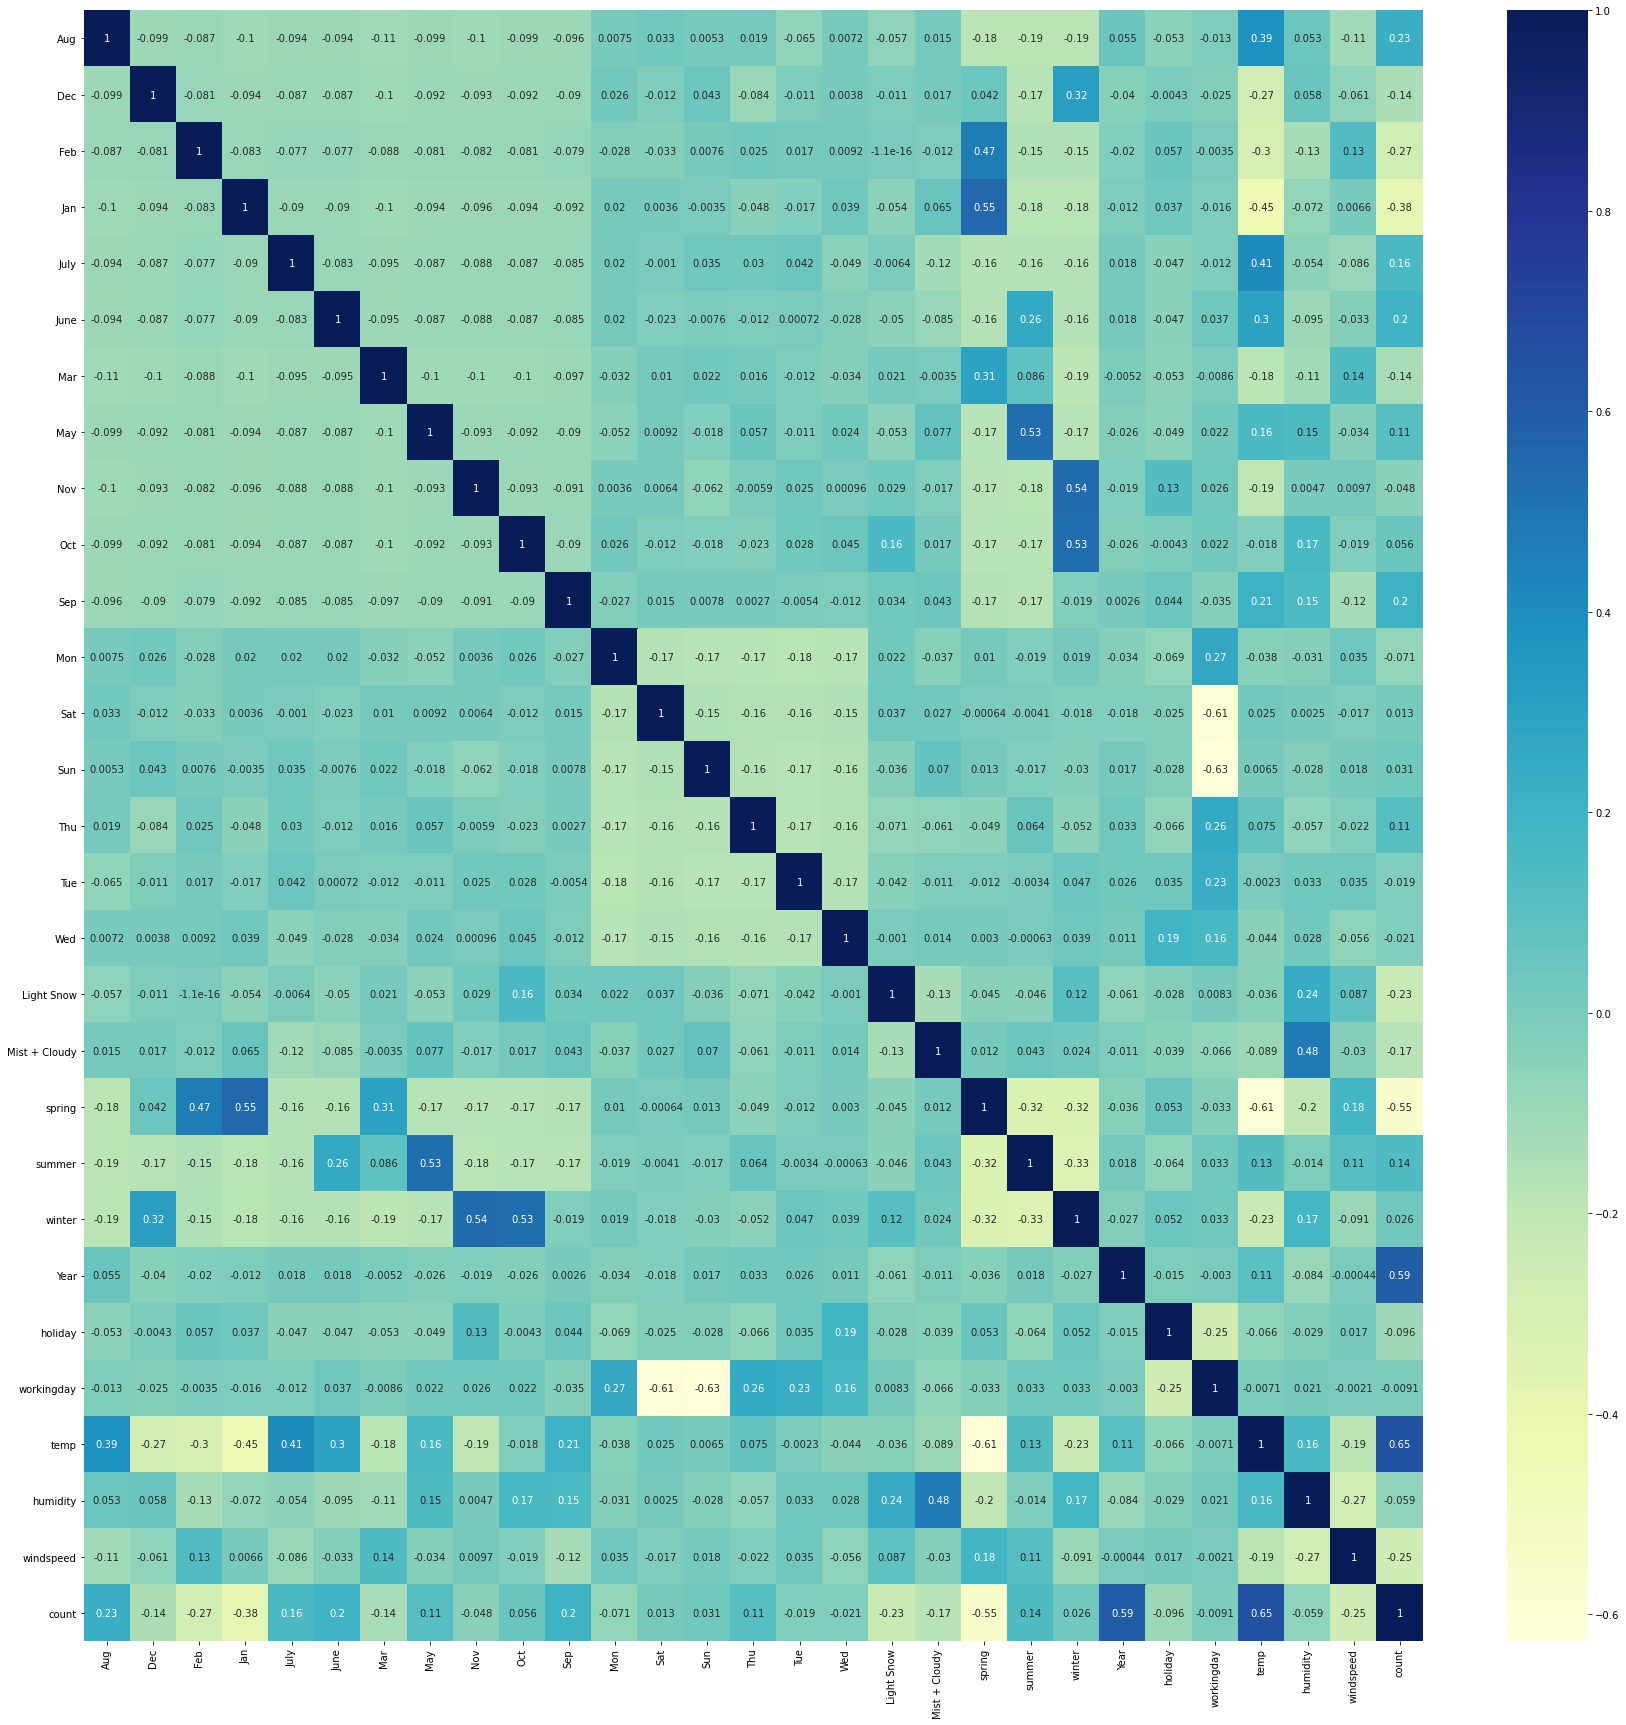

In [295]:
# Checking the presence of co-linearity of the data after scaling the values

plt.figure(figsize=(30,30))
sns.heatmap(bikedf_train.corr(),annot=True,cmap = 'YlGnBu')
plt.show()

In [296]:
# Dividing the Training dataset into X and Y variables for building the model. X = Independent Variables. y = Target Variable

y_train = bikedf_train.pop('count')
X_train = bikedf_train

# Building the Linear Regression Model
### RFE is used to automatically select the best independent variables and later will be finr tuned using Manual Feature Engineering


In [297]:
# Running the RFE

linreg = LinearRegression()
linreg.fit(X_train, y_train)

rfe = RFE(linreg,15)
rfe = rfe.fit(X_train, y_train)

In [298]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [299]:
cols = X_train.columns[rfe.support_]
cols

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [300]:
# Building X_train_rfe dataset using the relevant columns obtained from RFE

X_train_rfe = X_train[cols]
X_train_rfe.head()

,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,humidity,windspeed
576,0,0,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981


In [301]:
# adding a constant to the X_train_rfe dataset

import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,humidity,windspeed
576,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,0,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981


In [302]:
# Running the Linear Model on the dataset with the added constant

linreg = sm.OLS(y_train,X_train_rfe).fit()

In [303]:
# Summaryof the model built
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.15e-189
Time:                        17:48:07   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
Year              0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
humidity         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# Checking the VIF of the model built. It will help us fine tune the model

X_train_rfe_noconst = X_train_rfe.drop('const',axis=1)
X_train_rfe_noconst.head()

,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,humidity,windspeed
576,0,0,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981


In [305]:
# Calculating the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as varif

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_noconst.columns
vif['VIF_Values'] = [varif(X_train_rfe_noconst.values,i) for i in range(X_train_rfe_noconst.shape[1])]
vif['VIF_Values'] = round(vif['VIF_Values'],2)
vif = vif.sort_values(by='VIF_Values',ascending=False)
vif

,Features,VIF_Values
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


In [306]:
# Since 'Humidity' has an exceptionally high VIF, dropping the column and creating a new model

X_train_rfe_iter2 = X_train_rfe.drop('humidity',axis=1)
linreg2 = sm.OLS(y_train,X_train_rfe_iter2).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.75e-186
Time:                        17:48:40   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618

In [307]:
# VIF for the iter2 model
X_train_rfe_noconst2 = X_train_rfe_iter2.drop('const',axis=1)
print(X_train_rfe_noconst2.head())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_noconst2.columns
vif['VIF_Values'] = [varif(X_train_rfe_noconst2.values,i) for i in range(X_train_rfe_noconst2.shape[1])]
vif['VIF_Values'] = round(vif['VIF_Values'],2)
vif = vif.sort_values(by='VIF_Values',ascending=False)
vif

     Dec  Jan  July  Nov  Sep  Light Snow  Mist + Cloudy  spring  summer  \
576    0    0     1    0    0           0              0       0       0   
426    0    0     0    0    0           0              1       1       0   
728    1    0     0    0    0           0              0       1       0   
482    0    0     0    0    0           0              1       0       1   
111    0    0     0    0    0           0              1       0       1   

     winter  Year  holiday      temp  windspeed  
576       0     1        0  0.815169   0.264686  
426       0     1        0  0.442393   0.255342  
728       0     1        0  0.245101   0.663106  
482       0     1        0  0.395666   0.188475  
111       0     0        0  0.345824   0.380981  


,Features,VIF_Values
12,temp,5.17
13,windspeed,4.67
9,winter,2.95
7,spring,2.89
8,summer,2.24
10,Year,2.07
3,Nov,1.81
1,Jan,1.66
2,July,1.59
6,Mist + Cloudy,1.57


In [308]:
# Since 'Nov' has a high P-Value than the threshold fixed for this model (which is 0.03), dropping the column and creating a new model

X_train_rfe_iter3 = X_train_rfe_iter2.drop('Nov',axis=1)
linreg3 = sm.OLS(y_train,X_train_rfe_iter3).fit()
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.74e-186
Time:                        17:50:13   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310

In [309]:
# VIF for the iter3 model
X_train_rfe_noconst3 = X_train_rfe_iter3.drop('const',axis=1)
print(X_train_rfe_noconst3.head())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_noconst3.columns
vif['VIF_Values'] = [varif(X_train_rfe_noconst3.values,i) for i in range(X_train_rfe_noconst3.shape[1])]
vif['VIF_Values'] = round(vif['VIF_Values'],2)
vif = vif.sort_values(by='VIF_Values',ascending=False)
vif

     Dec  Jan  July  Sep  Light Snow  Mist + Cloudy  spring  summer  winter  \
576    0    0     1    0           0              0       0       0       0   
426    0    0     0    0           0              1       1       0       0   
728    1    0     0    0           0              0       1       0       0   
482    0    0     0    0           0              1       0       1       0   
111    0    0     0    0           0              1       0       1       0   

     Year  holiday      temp  windspeed  
576     1        0  0.815169   0.264686  
426     1        0  0.442393   0.255342  
728     1        0  0.245101   0.663106  
482     1        0  0.395666   0.188475  
111     0        0  0.345824   0.380981  


,Features,VIF_Values
11,temp,5.14
12,windspeed,4.62
6,spring,2.89
7,summer,2.24
9,Year,2.07
8,winter,2.05
1,Jan,1.65
2,July,1.59
5,Mist + Cloudy,1.57
3,Sep,1.34


### We can see that the lastest model has an adjusted R2 value of 83.4% and the VIF of the variables preset seem to be below 5, we will proceed with the model named "linreg3" as the final model. Continuing with residual analysis of the train data to verify the model.

In [310]:
# Checking the final train dataset obtained from the "linreg3" model

X_train_rfe_iter3.head()

,const,Dec,Jan,July,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,windspeed
576,1.0,0,0,1,0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.255342
728,1.0,1,0,0,0,0,0,1,0,0,1,0,0.245101,0.663106
482,1.0,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.188475
111,1.0,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.380981


In [311]:
# Predicting the values for the training dataset with the "linreg3" model

y_train_pred = linreg3.predict(X_train_rfe_iter3)

<Figure size 432x288 with 0 Axes>

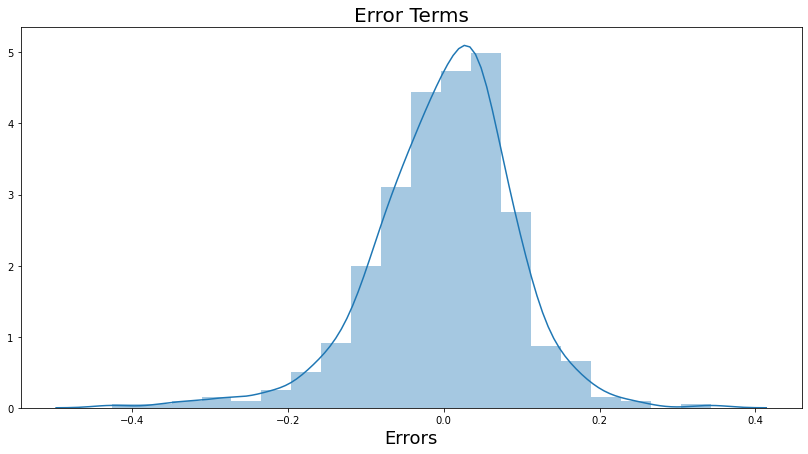

In [312]:
# Plotting the histogram for the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## From the above distribution, we can see that the error terms are normally distributed and thus we can accept our model

### Making predictions on the Test data with the linear model developed

In [313]:
# Fitting on the test data

bikedf_test[numeric_variables] = minmaxscaler.transform(bikedf_test[numeric_variables])
bikedf_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [314]:
# Dividing the test data into X and y

y_test = bikedf_test.pop('count')
X_test = bikedf_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [315]:
# Getting the relevant columns from the final model dataset which is to be used in the prediction of the test data

relevant_columns = X_train_rfe_noconst3.columns

X_test_new = X_test[relevant_columns]

# Adding a constant variable to the test data

X_test_const = sm.add_constant(X_test_new)
X_test_const.head()

,const,Dec,Jan,July,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,windspeed
184,1.0,0,0,1,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [316]:
# Making the Y_test predictions

y_test_pred = linreg3.predict(X_test_const)

In [317]:
# Evaluate the R2 value for the test prediction using the "linreg3" model

from sklearn.metrics import r2_score

r2_score(y_test , y_test_pred)

0.8063519606310001

### The "linreg3" model is giving us a R2 value of 80.8% on the Test Data. Comoparing it with the R2 value of the Train data which was 83.4%, we can conclude that the model developed explains the target variable "Count" with the help of other relevant independent variables 

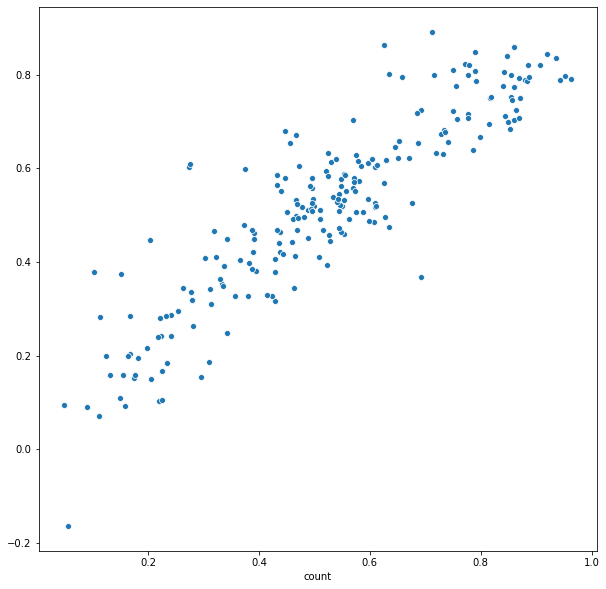

In [318]:
# Plotting the y_test and the y_test_pred values to understand the spread of the original and predicted data

plt.figure(figsize=(10,10))
sns.scatterplot(y_test,y_test_pred)
plt.show()

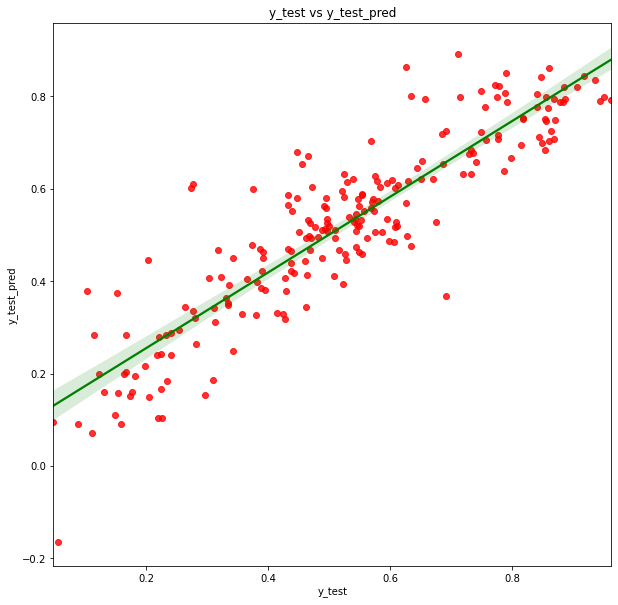

In [319]:
# Visualizing the fit on the test data with the straight line

plt.figure(figsize=(10,10))
sns.regplot(y_test,y_test_pred,ci=95,fit_reg=True,scatter_kws={"color": "red"},line_kws={"color": "green"})
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

### Final Result Comparison between Train model and Test:

*Train $ R^2 $ : 83%* <br>
*Test $ R^2 $: 81%* <br>
*Difference in $ R^2 $ between train and test: 2%*

# Interpretation derived based on the Model:
- We arrived at a very decent model for the the demand for shared bikes with the significant variables
- We can see that actual temperature variable is having the highest coefficient 0.4581, which means if the temperature increases by one unit the number of bike rentals increases by 0.4581 units.

Similary we can see coefficients of other variables in the equation for best fitted line.
We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have windspeed, mist cloudy , light snow, holiday variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

# Evaluation based on the model:

- Year: The company should encounter an increase in the number of users when the situation comes back to normal as compared to 2019.
- Season: The company should focus on expanding it's business in the Summer and the Fall season.
- Weather: The users prefer to rent a bike when the weather is pleasant i.e. either clear or cloudy and is comparatively less windy
- Temp: The users prefer to ride or rent a bike in a moderate temperature and not on the freezing days.

#### Hence when the situation comes back to normal, the company should face an increase in the business as compared to 2019 and should expand it's business with new availing offers or schemes in the season of summer and fall when the weather is pleasant with clear sky and moderate temperature.